In [0]:
# Change directory to VSCode workspace root so that relative path loads work correctly. Turn this addition off with the DataScience.changeDirOnImportExport setting
import os
try:
	os.chdir(os.path.join(os.getcwd(), '..'))
	print(os.getcwd())
except:
	pass


In [26]:
# Error of result simulated with dynamic weight
xError = np.empty_like(xRecalled)
for tt in range(len_t):
    xError[:,:,tt,:] = xRecalled[:,:,tt,:] - xMemory
xError = np.swapaxes(xError,2,3)
xError = np.reshape(xError,(nIter*N*M,len_t),order='C')
xError = np.mod(xError+pi,pi*2) - pi


In [27]:
# Error of result simulated without dynamic weight
xError_n = np.empty_like(xRecalled_n)
for tt in range(len_t):
    xError_n[:,:,tt,:] = xRecalled_n[:,:,tt,:] - xMemory
xError_n = np.swapaxes(xError_n,2,3)
xError_n = np.reshape(xError_n,(nIter*N*M,len_t),order='C')
xError_n = np.mod(xError_n+pi,pi*2) - pi



In [28]:
# Control level (FF only)
k_cue = 1/ (1/k_cue0 + v_noise*t/T_theta)
xError_FF = np.empty_like(xError)
for tt in range(len_t):
    xCue = xNoise[:,:,tt,:] + xMemory
    Z = exp(1j*xCue) + k_prior/k_cue[tt]
    xFF = np.angle(Z)
    Error_t = xFF-xMemory
    xError_FF[:,tt] = Error_t.flatten()
xError_FF = np.mod(xError_FF+pi,pi*2) - pi


In [29]:
tt = int(0/dt)
hist = [None for _ in range(3)]
fig1,ax1 = plt.subplots()
for m in range(3):
    hist[m],bin_edges,_ = ax1.hist(xError_all[m][:,tt],200,(-pi,pi), label=labels[m])
fig1.legend()
fig2 = plt.figure()
ax2 = fig2.add_subplot(111,projection='polar')
for m in range(3):
    ax2.plot(bin_edges,np.append(hist[m],hist[m][0]),drawstyle='steps-pre',label=labels[m])
fig2.legend()


NameError: name 'xError_all' is not defined

In [30]:
xError_all = np.array([xError,xError_n,xError_FF])
labels = ['dynamic cue weight','fixed cue weight','no synaptic info']
bias = np.mean(xError_all,axis=1)
stdL = np.std(xError_all,axis=1)
dspL = stdL**2 + bias**2
vR   = exp(1j*xError_all)
R    = abs(np.mean(vR,axis=1))
varC = 1-R
dspC = varC + 2*R*(np.sin(bias/2)**2)


In [31]:
filename = 'Data/Lengyel2005_alwaysUpdateXj_stochasticCue/ErrorCombined.npz'
xError_all = np.array([xError,xError_n,xError_FF])
np.savez(filename,xError=xError,xError_FF=xError_FF,xError_n=xError_n,xError_all=xError_all)


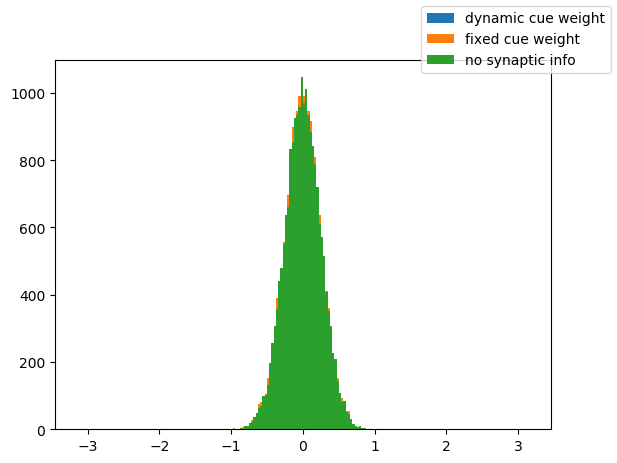

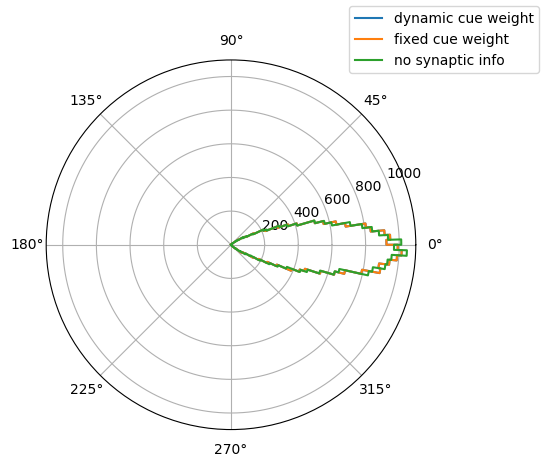

In [32]:
tt = int(0/dt)
hist = [None for _ in range(3)]
fig1,ax1 = plt.subplots()
for m in range(3):
    hist[m],bin_edges,_ = ax1.hist(xError_all[m][:,tt],200,(-pi,pi), label=labels[m])
fig1.legend()
fig2 = plt.figure()
ax2 = fig2.add_subplot(111,projection='polar')
for m in range(3):
    ax2.plot(bin_edges,np.append(hist[m],hist[m][0]),drawstyle='steps-pre',label=labels[m])
fig2.legend()


In [33]:
print(plt.style.available)
plt.style.use('seaborn')
plt.style.use('seaborn-talk')


['bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark-palette', 'seaborn-dark', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'seaborn', 'Solarize_Light2', 'tableau-colorblind10', '_classic_test']


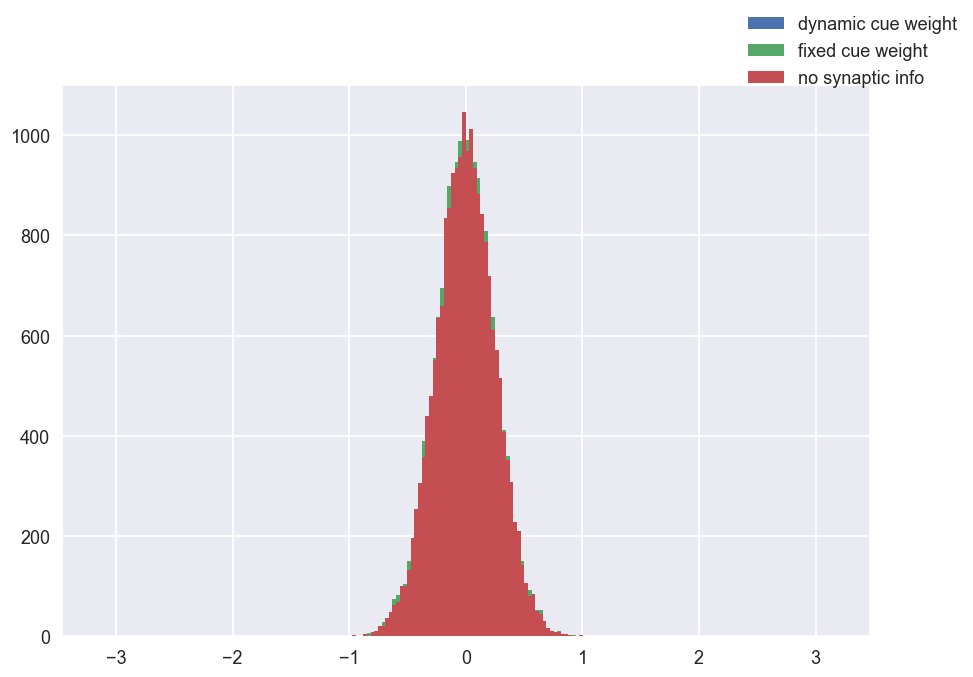

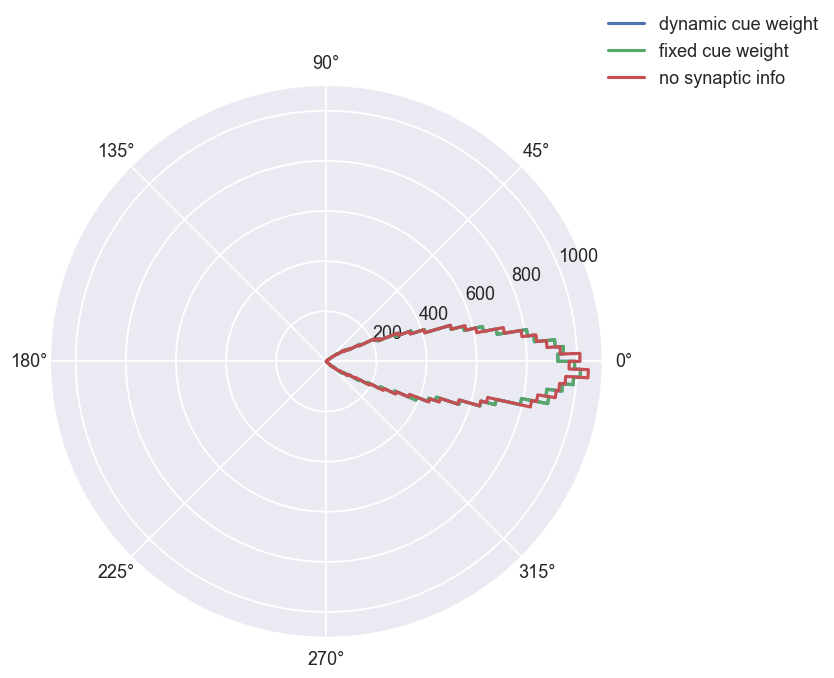

In [34]:
tt = int(0/dt)
hist = [None for _ in range(3)]
fig1,ax1 = plt.subplots()
for m in range(3):
    hist[m],bin_edges,_ = ax1.hist(xError_all[m][:,tt],200,(-pi,pi), label=labels[m])
fig1.legend()
fig2 = plt.figure()
ax2 = fig2.add_subplot(111,projection='polar')
for m in range(3):
    ax2.plot(bin_edges,np.append(hist[m],hist[m][0]),drawstyle='steps-pre',label=labels[m])
fig2.legend()


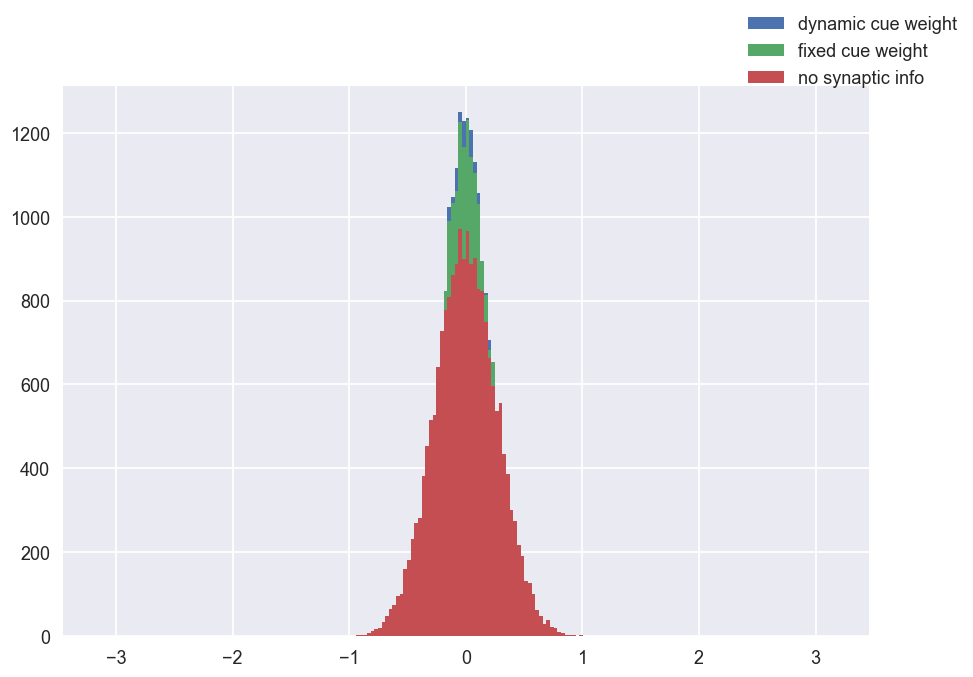

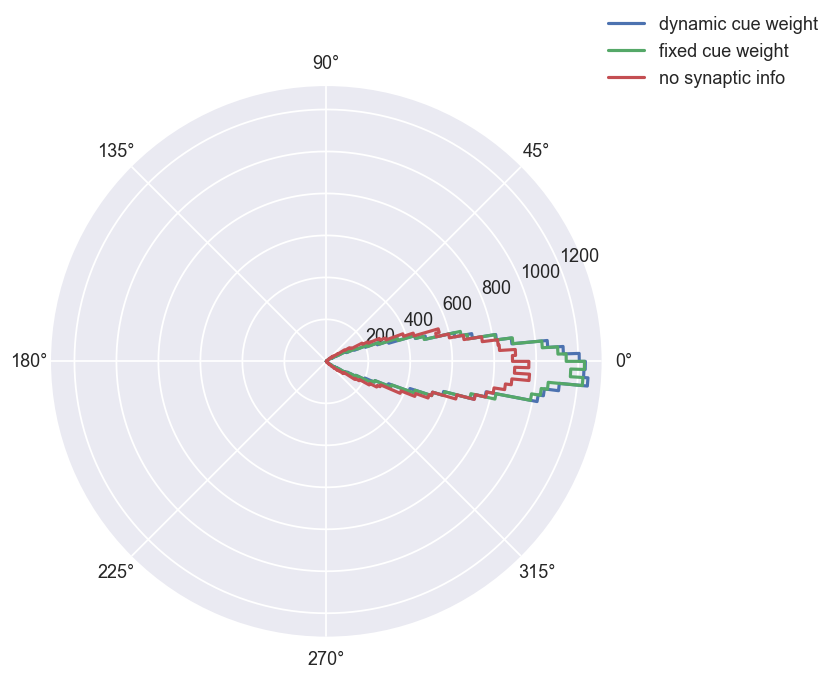

In [35]:
tt = int(10/dt)
hist = [None for _ in range(3)]
fig1,ax1 = plt.subplots()
for m in range(3):
    hist[m],bin_edges,_ = ax1.hist(xError_all[m][:,tt],200,(-pi,pi), label=labels[m])
fig1.legend()
fig2 = plt.figure()
ax2 = fig2.add_subplot(111,projection='polar')
for m in range(3):
    ax2.plot(bin_edges,np.append(hist[m],hist[m][0]),drawstyle='steps-pre',label=labels[m])
fig2.legend()


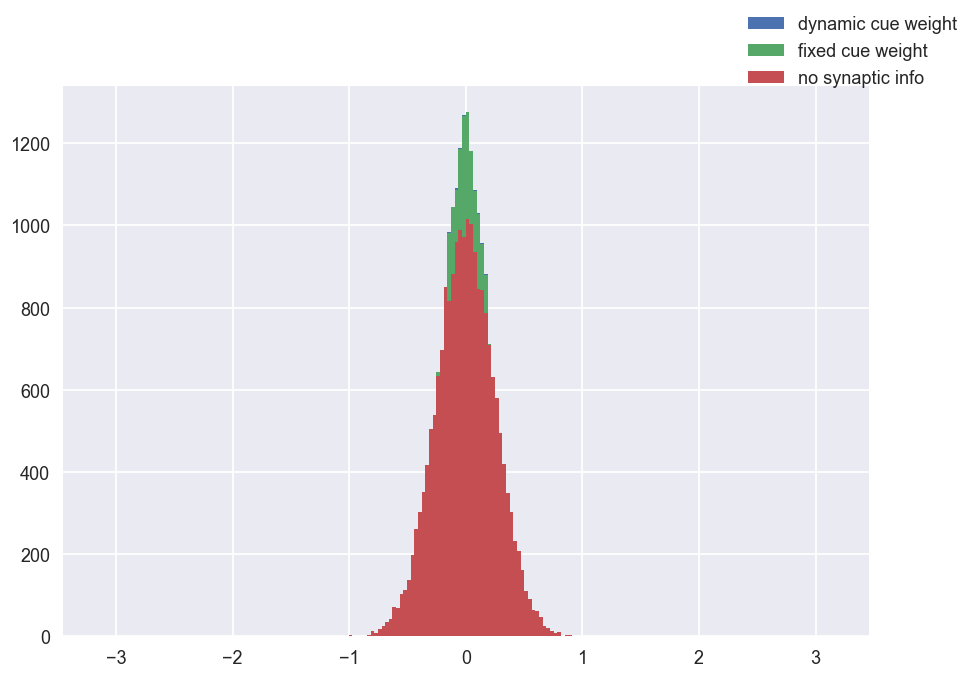

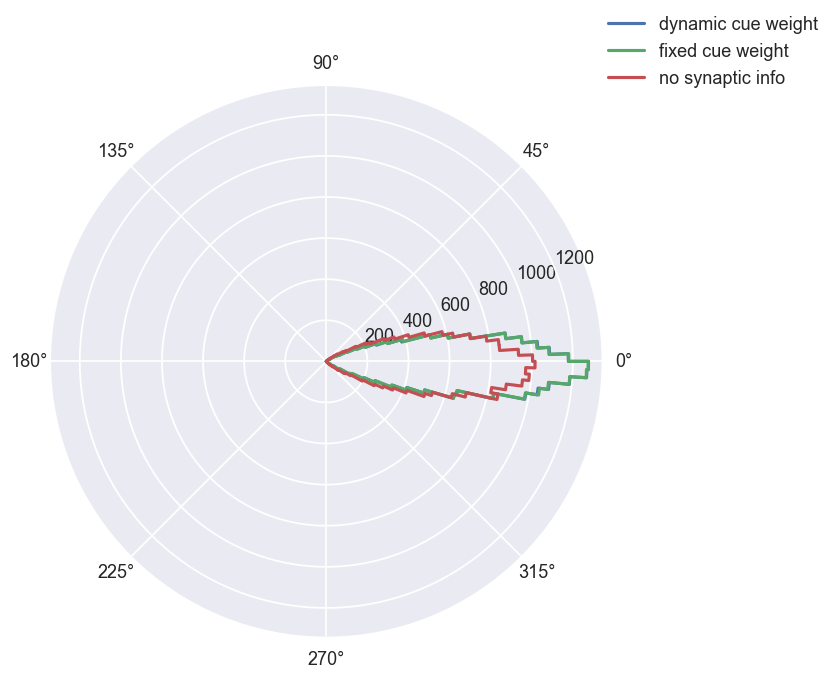

In [36]:
tt = int(1/dt)
hist = [None for _ in range(3)]
fig1,ax1 = plt.subplots()
for m in range(3):
    hist[m],bin_edges,_ = ax1.hist(xError_all[m][:,tt],200,(-pi,pi), label=labels[m])
fig1.legend()
fig2 = plt.figure()
ax2 = fig2.add_subplot(111,projection='polar')
for m in range(3):
    ax2.plot(bin_edges,np.append(hist[m],hist[m][0]),drawstyle='steps-pre',label=labels[m])
fig2.legend()


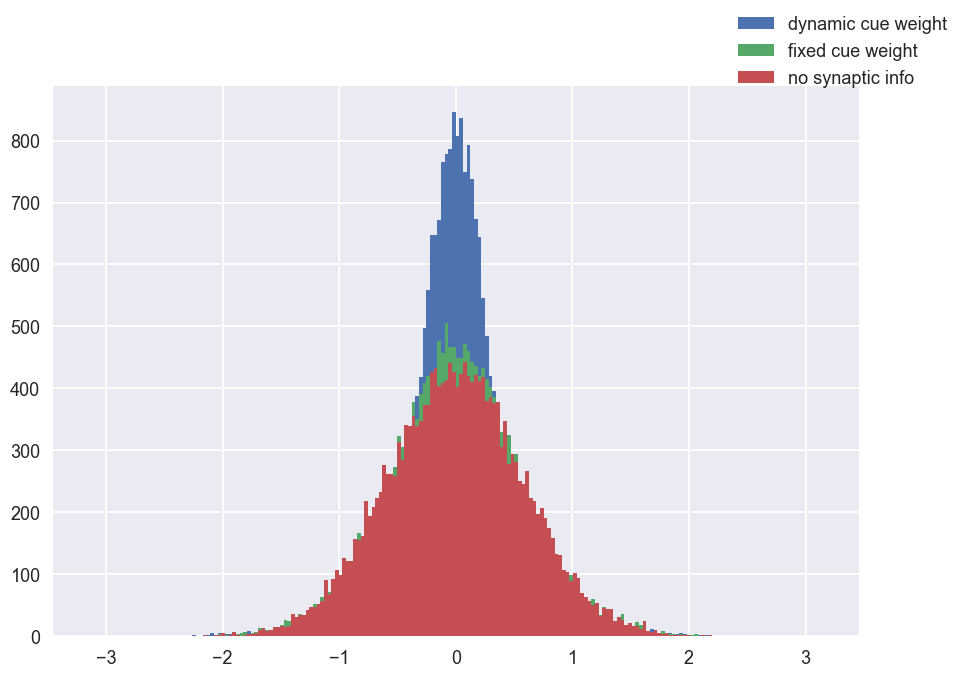

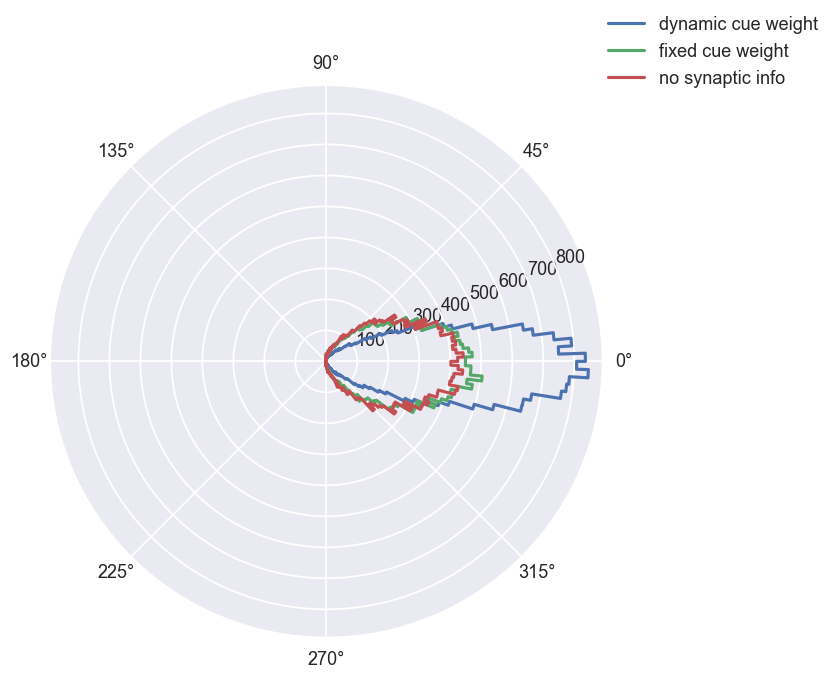

In [37]:
tt = int(300/dt)
hist = [None for _ in range(3)]
fig1,ax1 = plt.subplots()
for m in range(3):
    hist[m],bin_edges,_ = ax1.hist(xError_all[m][:,tt],200,(-pi,pi), label=labels[m])
fig1.legend()
fig2 = plt.figure()
ax2 = fig2.add_subplot(111,projection='polar')
for m in range(3):
    ax2.plot(bin_edges,np.append(hist[m],hist[m][0]),drawstyle='steps-pre',label=labels[m])
fig2.legend()


In [38]:
tt = int(1500/dt)
hist = [None for _ in range(3)]
fig1,ax1 = plt.subplots()
for m in range(3):
    hist[m],bin_edges,_ = ax1.hist(xError_all[m][:,tt],200,(-pi,pi), label=labels[m])
fig1.legend()
fig2 = plt.figure()
ax2 = fig2.add_subplot(111,projection='polar')
for m in range(3):
    ax2.plot(bin_edges,np.append(hist[m],hist[m][0]),drawstyle='steps-pre',label=labels[m])
fig2.legend()


IndexError: index 1500 is out of bounds for axis 1 with size 1250

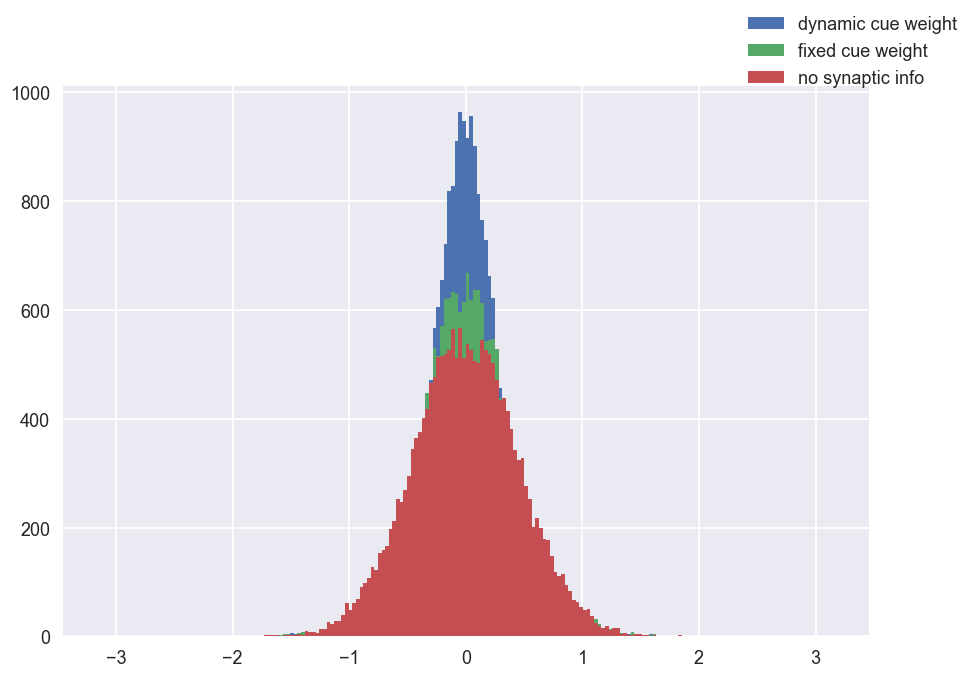

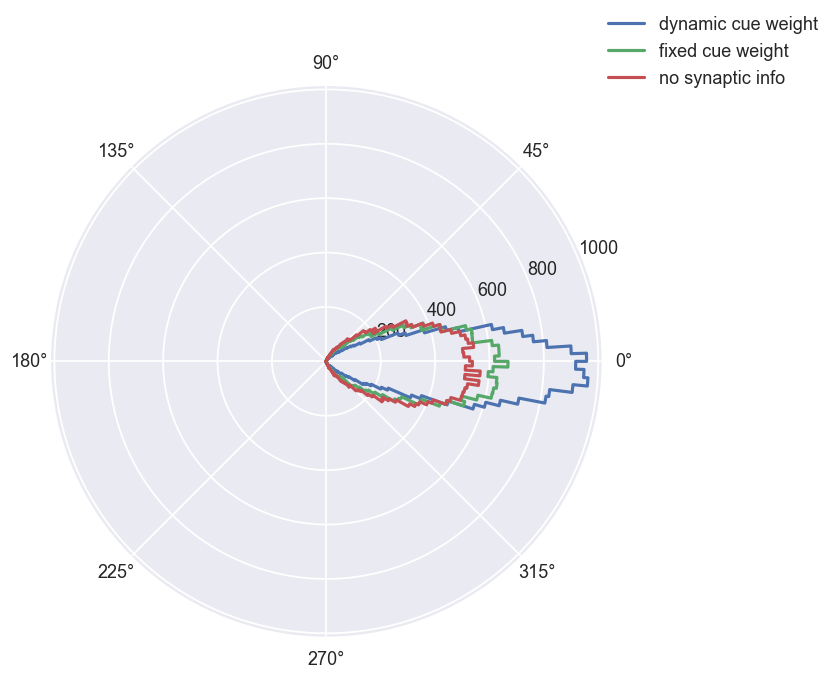

In [39]:
tt = int(150/dt)
hist = [None for _ in range(3)]
fig1,ax1 = plt.subplots()
for m in range(3):
    hist[m],bin_edges,_ = ax1.hist(xError_all[m][:,tt],200,(-pi,pi), label=labels[m])
fig1.legend()
fig2 = plt.figure()
ax2 = fig2.add_subplot(111,projection='polar')
for m in range(3):
    ax2.plot(bin_edges,np.append(hist[m],hist[m][0]),drawstyle='steps-pre',label=labels[m])
fig2.legend()


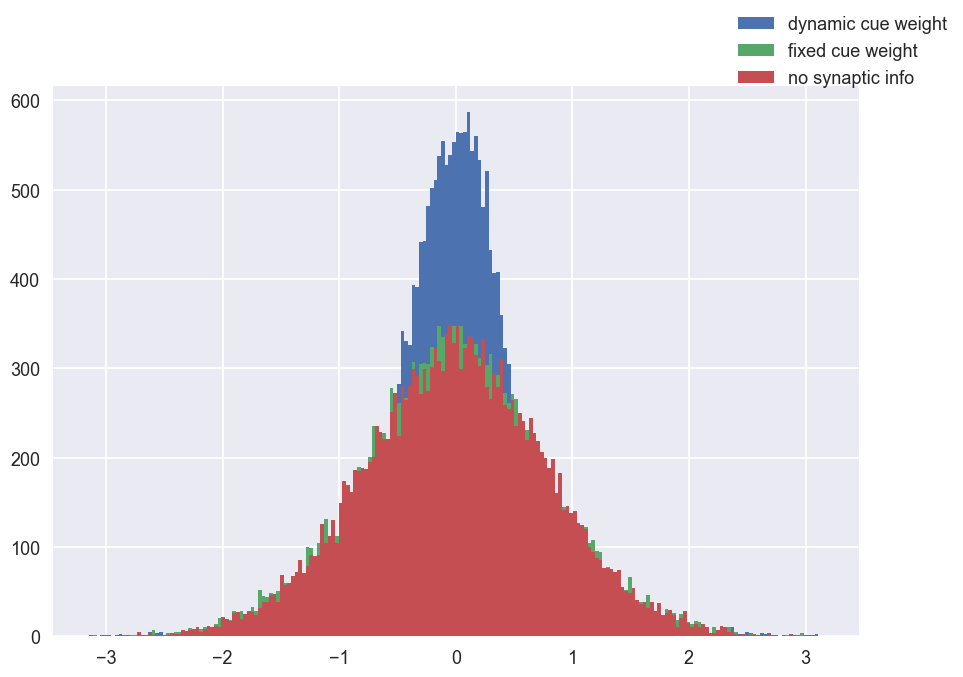

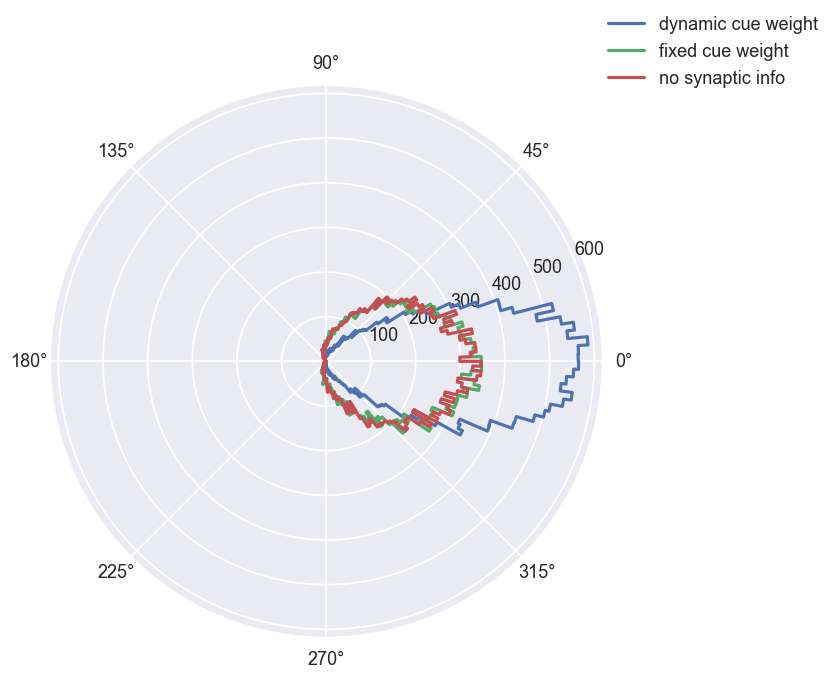

In [40]:
tt = int(600/dt)
hist = [None for _ in range(3)]
fig1,ax1 = plt.subplots()
for m in range(3):
    hist[m],bin_edges,_ = ax1.hist(xError_all[m][:,tt],200,(-pi,pi), label=labels[m])
fig1.legend()
fig2 = plt.figure()
ax2 = fig2.add_subplot(111,projection='polar')
for m in range(3):
    ax2.plot(bin_edges,np.append(hist[m],hist[m][0]),drawstyle='steps-pre',label=labels[m])
fig2.legend()


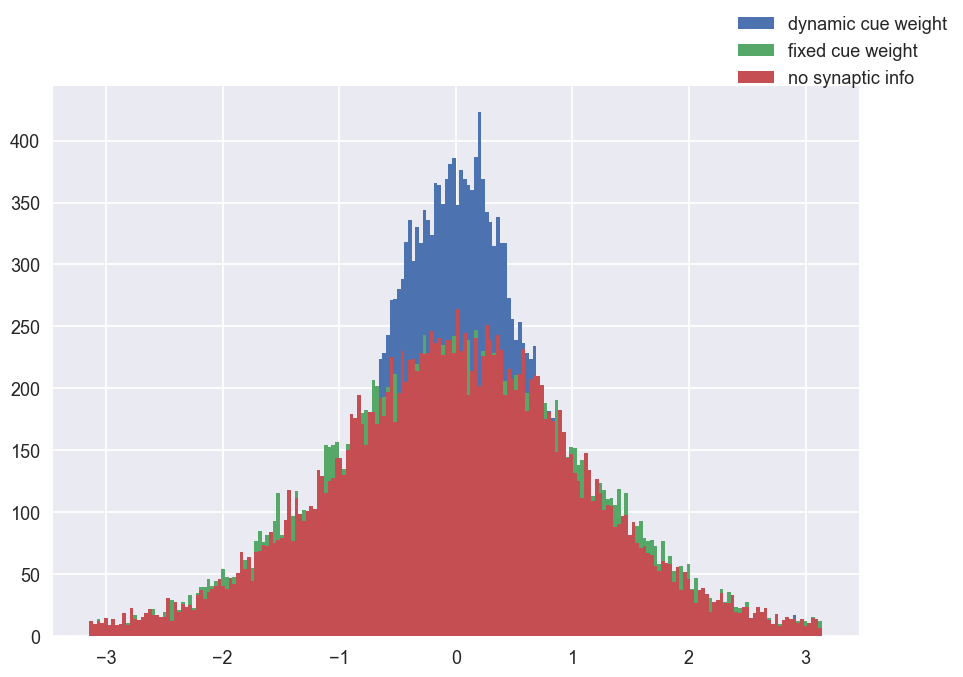

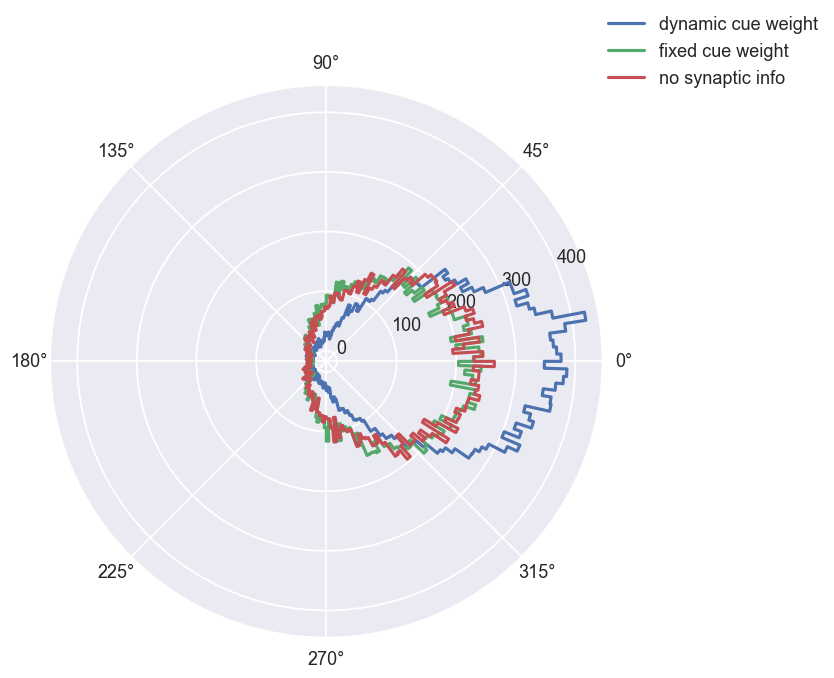

In [41]:
tt = int(1200/dt)
hist = [None for _ in range(3)]
fig1,ax1 = plt.subplots()
for m in range(3):
    hist[m],bin_edges,_ = ax1.hist(xError_all[m][:,tt],200,(-pi,pi), label=labels[m])
fig1.legend()
fig2 = plt.figure()
ax2 = fig2.add_subplot(111,projection='polar')
for m in range(3):
    ax2.plot(bin_edges,np.append(hist[m],hist[m][0]),drawstyle='steps-pre',label=labels[m])
fig2.legend()
